In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc("font", size=18, family="serif")
import yt
import numpy as np
import matplotlib.pyplot as plt
from yt.utilities.physical_ratios import cm_per_kpc, K_per_keV
from yt.units import mp
import pyxsim
import soxs
import aplpy


/home/aditiv/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/aditiv/anaconda3/lib/python3.6/site-packages/yt/analysis_modules/cosmological_observation/api.py:22: VisibleDeprecationWarning: Development of the LightRay module has been moved to the Trident package. This version is deprecated and will be removed from yt in a future release. See https://github.com/trident-project/trident for further information.
  from .light_ray.api import \
/home/aditiv/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(me

In [2]:
plt.rcParams['font.size']=20
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.minor.size']=5
plt.rcParams['xtick.major.width']=2
plt.rcParams['xtick.minor.width']=1
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.minor.size']=5
plt.rcParams['ytick.major.width']=2
plt.rcParams['ytick.minor.width']=1
plt.rcParams['ytick.direction']='in'

In [3]:
Msun     = 2.e33
ks       = 1.e3
area     = (2000.0, "cm**2") # collecting area
dist     = (1.0, "Mpc")
RA,dec   = (349.60, -42.0) 
nH       = 1.93e-2  #in units of 10^22 /cm/cm
Bins     = np.arange(0.0, 5., 1.e-3)
bins     = np.arange(0.0, 5., 0.13)
t        = 100 * ks    
exp_time = (t, "s") # exposure time
# tlow     = 1.e6


In [4]:
base     = "/home/aditiv/CGM/Pyxsim/Spectra"

folder = "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/" #hdhsfr
# folder ="HR_0821_1e-6_SFR3/"                   #ldlsfr  

    
if (folder == "HR_0821_n6e-5_T1e6_hse_SFR10_Rsf2kpc/"):
    filename = "DD0130/"
    outfile = folder + filename
    mass     = 69.1231289903726 * 1.e8 * Msun
    
elif (folder == "HR_0821_1e-6_SFR3/"):
    filename = "DD0300/"
    mass = 37.67087766588439 * 1.e8 * Msun
    outfile = folder + filename

In [5]:

Sim_evnty = np.loadtxt(folder + filename + "sim_spec_HR.txt",usecols=1)
Sim_evntx = np.loadtxt(folder + filename + "sim_spec_HR.txt",usecols=0)

sim_evnty = np.loadtxt(folder + filename + "sim_spec_LR.txt",usecols=1)
sim_evntx = np.loadtxt(folder + filename + "sim_spec_LR.txt",usecols=0)

Ub1_evnty = np.loadtxt(folder + filename + "ub_spec_HR.txt",usecols=1)
Ub1_evntx = np.loadtxt(folder + filename + "ub_spec_HR.txt",usecols=0)


ub1_evnty = np.loadtxt(folder + filename + "ub_spec_LR.txt",usecols=1)
ub1_evntx = np.loadtxt(folder + filename + "ub_spec_LR.txt",usecols=0)


In [6]:
#Get TLow value from Simulations
temp  = np.loadtxt(folder + filename  + "temp_cellm.txt",usecols=0)
cellm = np.loadtxt(folder + filename  + "temp_cellm.txt",usecols=1)

peak   = np.amax(cellm)
fwhm1  = cellm[:]>=peak/2. 
tlow   = temp[np.where(cellm[:]==np.amax(cellm))]
print(tlow)


#Get Density value from Simulations
dens  = np.loadtxt(folder + filename  + "dens_cellm.txt",usecols=0)
cellm = np.loadtxt(folder + filename  + "dens_cellm.txt",usecols=1)

peak   = np.amax(cellm)
fwhm1  = cellm[:]>=peak/2. 
rho01  = dens[np.where(cellm[:]==np.amax(cellm))]

temp  = np.loadtxt(folder + filename  + "met_temp.txt",usecols=0)
met   = np.loadtxt(folder + filename  + "met_temp.txt",usecols=1)

Zmetub01 = np.average(met[fwhm1])

[1704133.41161909]


In [7]:
R = 500. # radius of cluster in kpc
R0 = 44.22 
v0 = 1.e8/3.0**0.5  #in cm^2
nx = 400

ddims = (nx,nx,nx)
x, y, z = np.mgrid[-R:R:nx*1j,
                   -R:R:nx*1j,
                   -R:R:nx*1j]

r     = np.sqrt(x**2+y**2+z**2)
r0    = np.full(ddims, 6.25)
T     = tlow*np.ones(ddims)
dens  = np.zeros(ddims)
dens  = np.full(ddims, rho01)

velx  = np.zeros(ddims)
vely  = np.zeros(ddims)
velz  = np.zeros(ddims)

#Comment the following line to get static gas in Box
velx[r<=R0] = v0 * (r0[r<=R0]/r[r<R0])**(2./3.)  * (x[r<=R0]/r[r<=R0])
vely[r<=R0] = v0 * (r0[r<=R0]/r[r<R0])**(2./3.)  * (y[r<=R0]/r[r<=R0])
velz[r<=R0] = v0 * (r0[r<=R0]/r[r<R0])**(2./3.)  * (z[r<=R0]/r[r<=R0])



data = {}
data["density"] = (dens, "g/cm**3")
data["temperature"] = (T, "K")
data["velocity_x"]  = (velx, "cm/s")
data["velocity_y"]  = (velx, "cm/s")
data["velocity_z"]  = (velz, "cm/s")

bbox = np.array([[-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5]]) # The bounding box of the domain in code units 

boxlow  = yt.load_uniform_grid(data, ddims, 2*R*cm_per_kpc, bbox=bbox)


yt : [INFO     ] 2020-03-06 15:53:40,824 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-03-06 15:53:41,830 Parameters: domain_dimensions         = [400 400 400]
yt : [INFO     ] 2020-03-06 15:53:41,904 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2020-03-06 15:53:41,973 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2020-03-06 15:53:41,975 Parameters: cosmological_simulation   = 0.0


In [9]:
R = 500. # radius of cluster in kpc
R0 = 44.22 
v0 = 1.e8/3.0**0.5  #in cm^2
nx = 400
thigh    = 3.e6
ddims = (nx,nx,nx)
x, y, z = np.mgrid[-R:R:nx*1j,
                   -R:R:nx*1j,
                   -R:R:nx*1j]

r     = np.sqrt(x**2+y**2+z**2)
r0    = np.full(ddims, 6.25)

T     = thigh*np.ones(ddims)
dens  = np.zeros(ddims)
dens  = np.full(ddims, rho01)

velx  = np.zeros(ddims)
vely  = np.zeros(ddims)
velz  = np.zeros(ddims)

#Comment the following line to get static gas in Box
velx[r<=R0] = v0 * (r0[r<=R0]/r[r<R0])**(2./3.)  * (x[r<=R0]/r[r<=R0])
vely[r<=R0] = v0 * (r0[r<=R0]/r[r<R0])**(2./3.)  * (y[r<=R0]/r[r<=R0])
velz[r<=R0] = v0 * (r0[r<=R0]/r[r<R0])**(2./3.)  * (z[r<=R0]/r[r<=R0])



data = {}
data["density"] = (dens, "g/cm**3")
data["temperature"] = (T, "K")
data["velocity_x"]  = (velx, "cm/s")
data["velocity_y"]  = (velx, "cm/s")
data["velocity_z"]  = (velz, "cm/s")

bbox = np.array([[-0.5, 0.5], [-0.5, 0.5], [-0.5, 0.5]]) # The bounding box of the domain in code units 

boxhigh  = yt.load_uniform_grid(data, ddims, 2*R*cm_per_kpc, bbox=bbox)


yt : [INFO     ] 2020-03-06 15:55:14,523 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-03-06 15:55:15,205 Parameters: domain_dimensions         = [400 400 400]
yt : [INFO     ] 2020-03-06 15:55:15,249 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2020-03-06 15:55:15,251 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2020-03-06 15:55:15,254 Parameters: cosmological_simulation   = 0.0


In [10]:
from functions import get_reff
reff1 = get_reff(boxlow, mass)


In [10]:
ubcr_low     = boxlow.sphere("c", (reff1,"kpc"))
source_model = pyxsim.ThermalSourceModel("apec", 0.1, 5.0, 5000, Zmet=Zmetub01)
Photons      = pyxsim.PhotonList.from_data_source(ubcr_low,0.0, area, exp_time, source_model,dist=dist)
Events       = Photons.project_photons("z", (RA, dec), absorb_model="wabs", nH=nH)
Events1      = Photons.project_photons("z", (RA, dec))
energy = Events["eobs"]
Ega = np.asarray(energy)
UbL_evnty , UbL_evntx  = np.histogram(Ega, bins=Bins) 
ubL_evnty , ubL_evntx  = np.histogram(Ega, bins=bins) 


np.savetxt(folder + filename + "lowub_spec_HR.txt",np.column_stack([UbL_evntx[:-1],UbL_evnty/t]))
np.savetxt(folder + filename + "lowub_spec_LR.txt",np.column_stack([ubL_evntx[:-1], ubL_evnty/t]))


soxs : [INFO     ] 2019-09-21 15:51:11,573 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-09-21 15:51:11,630 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-09-21 15:51:11,635 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-09-21 15:51:11,922 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-09-21 15:51:11,925 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-09-21 15:51:11,927 Using temperature field '(gas, temperature)'.
Processing cells/particles : 100%|█████████▉| 41074/41088 [00:33<00:00, 3054.53it/s]pyxsim : [INFO     ] 2019-09-21 15:52:37,164 Finished generating photons.
pyxsim : [INFO     ] 2019-09-21 15:52:37,918 Number of photons generated: 193341576
pyxsim : [INFO     ] 2019-09-21 15:52:37,937 Number of cells with photons: 41088
pyxsim : [INFO     ] 2019-09-21 15:52:41,382 Doppler-shifting photon energies.
Doppler shifting photons: 100%|

In [30]:
ubcr_high    = boxhigh.sphere("c", (reff1,"kpc"))
source_model = pyxsim.ThermalSourceModel("apec", 0.1, 5.0, 5000, Zmet=Zmetub01)
Photons      = pyxsim.PhotonList.from_data_source(ubcr_high,0.0, area, exp_time, source_model,dist=dist)
Events       = Photons.project_photons("z", (RA, dec), absorb_model="wabs", nH=nH)
Events1      = Photons.project_photons("z", (RA, dec))
energy = Events["eobs"]
Ega = np.asarray(energy)
UbH_evnty , UbH_evntx  = np.histogram(Ega, bins=Bins) 
ubH_evnty , ubH_evntx  = np.histogram(Ega, bins=bins) 


# np.savetxt(folder + filename + "high_ub_spec_HR.txt",np.column_stack([UbH_evntx[:-1],UbH_evnty/t]))
# np.savetxt(folder + filename + "high_ub_spec_LR.txt",np.column_stack([ubH_evntx[:-1], ubH_evnty/t]))


soxs : [INFO     ] 2019-09-21 16:44:45,022 Using APEC version 3.0.9.
soxs : [INFO     ] 2019-09-21 16:44:45,828 Using apec_v3.0.9_line.fits for generating spectral lines.
soxs : [INFO     ] 2019-09-21 16:44:45,847 Using apec_v3.0.9_coco.fits for generating the continuum.
pyxsim : [INFO     ] 2019-09-21 16:44:52,052 Observing local source at distance 999.9999999999999 kpc.
pyxsim : [INFO     ] 2019-09-21 16:44:52,086 Using emission measure field '(gas, emission_measure)'.
pyxsim : [INFO     ] 2019-09-21 16:44:52,088 Using temperature field '(gas, temperature)'.
Processing cells/particles :  99%|█████████▉| 40848/41088 [00:22<00:00, 5710.22it/s]pyxsim : [INFO     ] 2019-09-21 16:45:46,967 Finished generating photons.
pyxsim : [INFO     ] 2019-09-21 16:45:49,136 Number of photons generated: 108625620
pyxsim : [INFO     ] 2019-09-21 16:45:49,140 Number of cells with photons: 41088
pyxsim : [INFO     ] 2019-09-21 16:45:50,081 Doppler-shifting photon energies.
Doppler shifting photons: 100%|

In [25]:
np.savetxt(folder + filename + "high_ub_spec_HR.txt",np.column_stack([UbH_evntx[:-1],UbH_evnty/t/3.]))
np.savetxt(folder + filename + "high_ub_spec_LR.txt",np.column_stack([ubH_evntx[:-1], ubH_evnty/t/3.0]))


In [27]:
np.savetxt(folder + filename + "lowub_spec_HR.txt",np.column_stack([UbL_evntx[:-1],0.8*UbL_evnty/t]))
np.savetxt(folder + filename + "lowub_spec_LR.txt",np.column_stack([ubL_evntx[:-1], 0.8*ubL_evnty/t]))


In [ ]:
f, ax = plt.subplots(3, 1, gridspec_kw = {'wspace':0.4, 'hspace':0.1,},\
                        figsize=(12, 18))
for i in range(3):
    ax[i].tick_params(direction='in', which='both')
    ax[i].tick_params(labelsize=18)
    ax[i].tick_params(size=10.0)
    ax[i].tick_params(size=5.0,which='minor')
    ax[i].tick_params(width=1.2)
    ax[i].tick_params(width=0.5,which='minor')
    ax[i].set_yscale('log')
    ax[i].set_ylabel(r'counts s$^{-1}$ keV$^{-1}$') 
    ax[i].plot(Sim_evntx, Sim_evnty/Sim_evntx, '-',label='Simulation')
    ax[i].plot(UbL_evntx[:-1], UbL_evnty/UbL_evntx[:-1]/t,'-.', label=str(tlow/1.e6)+'MK')
    ax[i].plot(UbH_evntx[:-1], UbH_evnty/UbH_evntx[:-1]/t,'-.', label=str(thigh/1.e6)+'MK')
    
ax[0].set_xlim(.1,2.0)
ax[0].set_title(r"$Z=$" + str(Zmetub01)+" Z$_{\odot}$")
# ax[0].text(0.75, 5.e-6,r"$T=$" + str(t0/1.e6)+"$X10^6$ K")
ax[1].set_xlim(.6,0.7)
ax[2].set_xlim(.7,0.8)
ax[2].set_xlabel('Energy(keV)')
ax[0].legend()
plt.savefig(outfile + "sim_ub_sum_HR.pdf")

/home/aditiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/aditiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/aditiv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


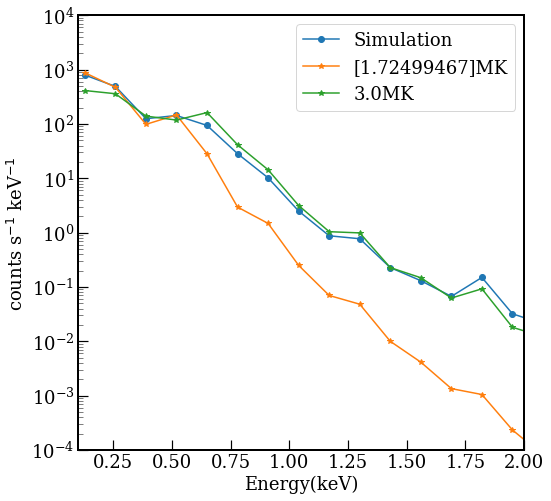

In [41]:
#Generating Low Res Spectra For UB and Sim

f, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.4, 'hspace':0.1,},\
                        figsize=(8, 8))

ax.tick_params(direction='in', which='both')
ax.tick_params(labelsize=18)
ax.tick_params(size=10.0)
ax.tick_params(size=5.0,which='minor')
ax.tick_params(width=1.2)
ax.tick_params(width=0.5,which='minor')
ax.set_yscale('log')
ax.set_ylabel(r'counts s$^{-1}$ keV$^{-1}$') 
ax.plot(sim_evntx, sim_evnty/sim_evntx, '-o',label='Simulation')
ax.plot(ubL_evntx[:-1], 0.8*ubL_evnty/ubL_evntx[:-1]/t,'-*', label=str(tlow/1.e6)+'MK')
ax.plot(ubH_evntx[:-1], ubH_evnty/ubH_evntx[:-1]/t/1.2,'-*', label=str(thigh/1.e6)+'MK')
# ax.plot(ubH_evntx[:-1], (ubH_evnty/3.0+ 0.75*ubL_evnty)/ubH_evntx[:-1]/t,'-.', \
#         label=str(thigh/1.e6)+'MK' + '+' + str(tlow/1.e6)+'MK')

ax.set_xlim(.1,2.0)
ax.set_ylim(1.e-4,1.e4)
ax.set_xlabel('Energy(keV)')
ax.legend()
# plt.savefig(outfile+"sim_ub_sum_LR.pdf")